# MNIST Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating a function that will be used later

In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred_linear)
    ConfusionMatrixDisplay(cm).plot()

# Downloading the data and inspecting it

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\marku\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_test = X[5000:6000]
y_test = y[5000:6000]

# Standardizing the data (as you always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[60000:]
# y_test = y[60000:]

In [6]:
# The first label ("true answer") is 5. 
y[0]

5

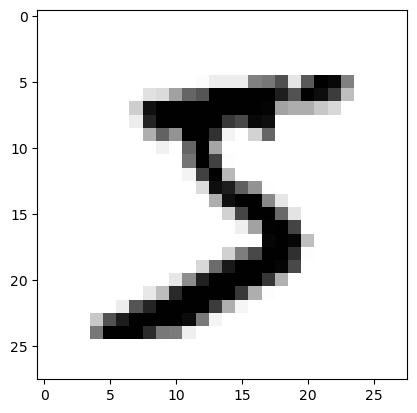

In [7]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

In [8]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


# Creating a simple modell and evaluating it on the test set

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Users\marku\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [10]:
y_pred_linear = lin_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_linear)

0.844

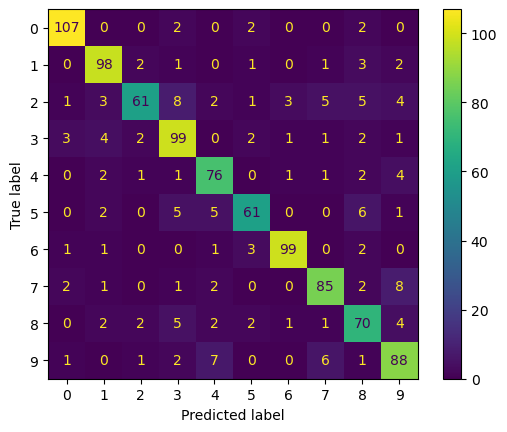

In [11]:
display_confusion_matrix(y_test, y_pred_linear)

# Modell Selection with RandomizedSearch & Gridsearch

In [12]:
svm_clf = SVC()

## Doing Randomized Search (Takes a while to run)

In [13]:
hyper_param_distribution = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, hyper_param_distribution, n_iter=10, verbose=2, cv=3)

In [14]:
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=6.538397025703425, gamma=0.004463221843830152; total time=  17.2s
[CV] END ....C=6.538397025703425, gamma=0.004463221843830152; total time=  16.9s
[CV] END ....C=6.538397025703425, gamma=0.004463221843830152; total time=  14.2s
[CV] END ......C=8.74171696706385, gamma=0.07764164797261691; total time=  24.1s
[CV] END ......C=8.74171696706385, gamma=0.07764164797261691; total time=  23.0s
[CV] END ......C=8.74171696706385, gamma=0.07764164797261691; total time=  20.1s
[CV] END ...C=10.27552513824769, gamma=0.0021634658133231235; total time=   9.6s
[CV] END ...C=10.27552513824769, gamma=0.0021634658133231235; total time=  10.5s
[CV] END ...C=10.27552513824769, gamma=0.0021634658133231235; total time=  10.3s
[CV] END ...C=10.831008594932516, gamma=0.026612450556709168; total time=  20.0s
[CV] END ...C=10.831008594932516, gamma=0.026612450556709168; total time=  22.2s
[CV] END ...C=10.831008594932516, gamma=0.026612

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021DA8FCD280>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021DA8FB8A30>},
                   verbose=2)

In [15]:
y_pred_rnd = rnd_search_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_rnd)

0.935

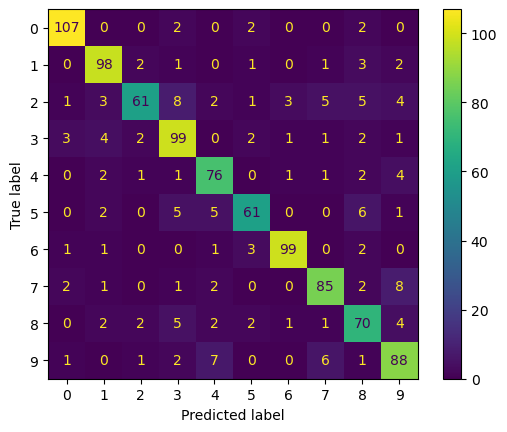

In [16]:
display_confusion_matrix(y_test, y_pred_rnd)

## Doing GridSearch (Takes a while to run) - remove the comments if you want to run the code

In [21]:
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [0, 1, 2], 'C': [0.5, 1, 1.5]}
]

grid_search = GridSearchCV(svm_clf, hyper_param_grid, cv = 3)

In [18]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 1.5], 'gamma': [0, 1, 2],
                          'kernel': ['rbf', 'poly']}])

In [19]:
y_pred_grid = grid_search.predict(X_test_scaled)
accuracy_score(y_test, y_pred_grid)

0.94

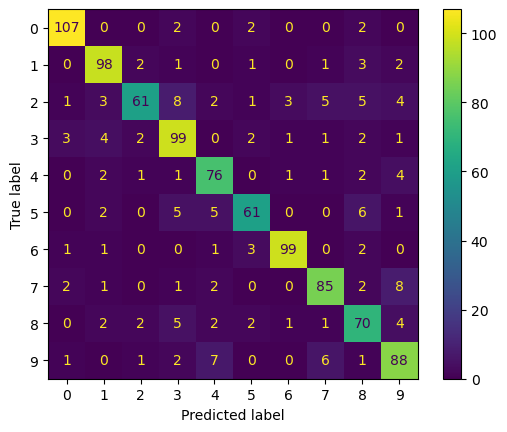

In [20]:
display_confusion_matrix(y_test, y_pred_grid)